# Challenge DADOS Alura Ca$h - Agosto 2022

## Resumo das Semanas

### Semana 01

Caso ainda não tenha assistido ao vídeo do primeiro desafio, acesse o link da [**Semana 1**](https://www.alura.com.br/challenges/dados/semana-01-tratamento-de-dados)

----

**Boas-vindas!**

Você foi contratado(a) como pessoa cientista de dados para trabalhar em um banco digital internacional chamado **Alura Cash**. Na primeira reunião do seu novo trabalho, a diretoria financeira informa que, recorrentemente, estão surgindo pessoas inadimplentes após a liberação de créditos. Portanto, é solicitada uma solução para que seja possível diminuir as perdas financeiras por conta de pessoas mutuarias que não quitam suas dívidas.

Como cientista de dados, você sugere um estudo das informações financeiras e de solicitação de empréstimo para encontrar padrões que possam indicar uma possível inadimplência.

Desse modo, você solicita um conjunto de dados que contenha as informações de clientes, da solicitação de empréstimo, do histórico de crédito, bem como se a pessoa mutuaria é inadimplente ou não. Com esses dados, você sabe que consegue modelar um classificador capaz de encontrar potenciais clientes inadimplentes e solucionar o problema do Alura Cash.

Por fim, você vai utilizar o **GitHub** e desenvolver um **portfólio** focado em Data Science, Data Analytics e Machine Learning.

# Importações

In [1]:
import pandas as pd
import numpy as np

# Datasets

## Leitura do arquivo CSV

In [2]:
uri = 'https://raw.githubusercontent.com/tarik-pomim/challenge_dados_082022/main/dados.csv'

In [3]:
dataset = pd.read_csv(uri)

## Avaliações iniciais do dataset

In [4]:
dataset.sample(10)

,person_id,loan_id,cb_id,person_id.1,person_age,person_income,person_home_ownership,person_emp_length,loan_id.1,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_id.1,cb_person_default_on_file,cb_person_cred_hist_length
32241,YYBEdtTG-l49W,xj5HkTGz-0eJq,dUdWar6W-p0zv,YYBEdtTG-l49W,22.0,32000.0,Rent,0.0,xj5HkTGz-0eJq,Venture,A,4000.0,5.42,0.0,0.13,dUdWar6W-p0zv,N,4.0
20624,EfdzEBEq-lcdk,bwvTEMLY-ru6H,uh5BSZdj-qcag,EfdzEBEq-lcdk,22.0,120000.0,Mortgage,3.0,bwvTEMLY-ru6H,Medical,C,9600.0,13.22,0.0,0.08,uh5BSZdj-qcag,Y,4.0
18732,2q0RObIB-NfJb,OMofxQLc-xikK,FZ5RX7zo-kNTW,2q0RObIB-NfJb,26.0,14400.0,Rent,NaN,OMofxQLc-xikK,Medical,A,2000.0,6.92,0.0,0.14,FZ5RX7zo-kNTW,N,4.0
22635,0UYqPzyC-UTkd,o8g3oqY5-EFMv,zm0rRBvR-bWsP,0UYqPzyC-UTkd,24.0,52000.0,Rent,6.0,o8g3oqY5-EFMv,Debtconsolidation,A,10000.0,7.88,0.0,0.19,zm0rRBvR-bWsP,N,4.0
3808,j9IbTgZC-LGnk,H6diPHy2-fwRI,AZCOTOnN-lsDZ,j9IbTgZC-LGnk,36.0,148000.0,Mortgage,6.0,H6diPHy2-fwRI,Debtconsolidation,D,10000.0,14.11,1.0,0.07,AZCOTOnN-lsDZ,N,13.0
20627,4EwrRF40-rf0D,yzRO3sWg-7YcS,zC0FPUEd-3DqZ,4EwrRF40-rf0D,27.0,98000.0,Mortgage,NaN,yzRO3sWg-7YcS,Personal,B,10000.0,12.69,0.0,0.10,zC0FPUEd-3DqZ,N,7.0
925,D5k0T0Da-3s7v,LG4YNtBW-0U7Z,TZPaG8YZ-kIt3,D5k0T0Da-3s7v,23.0,60000.0,Rent,4.0,LG4YNtBW-0U7Z,Medical,A,12000.0,6.03,0.0,0.20,TZPaG8YZ-kIt3,N,3.0
10878,7hG5JRUE-Dwz7,Eonh2aCT-atjT,uLzJ5HDy-sqHz,7hG5JRUE-Dwz7,36.0,33600.0,Own,NaN,Eonh2aCT-atjT,Personal,A,3000.0,8.49,0.0,0.09,uLzJ5HDy-sqHz,N,14.0
14606,1sFwYKeI-uGLy,RLcHRqiG-Eykx,GEa73DYJ-bZni,1sFwYKeI-uGLy,26.0,64999.0,Mortgage,11.0,RLcHRqiG-Eykx,Venture,B,15000.0,10.99,0.0,0.23,GEa73DYJ-bZni,N,2.0
29624,chA7jLNb-5qWu,EzYxZhhY-4F4j,E1wtki9F-XM9A,chA7jLNb-5qWu,22.0,34560.0,Rent,2.0,EzYxZhhY-4F4j,Homeimprovement,E,1200.0,19.29,1.0,0.03,E1wtki9F-XM9A,N,2.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34501 entries, 0 to 34500
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_id                   34485 non-null  object 
 1   loan_id                     34501 non-null  object 
 2   cb_id                       34501 non-null  object 
 3   person_id.1                 34485 non-null  object 
 4   person_age                  34177 non-null  float64
 5   person_income               34162 non-null  float64
 6   person_home_ownership       34170 non-null  object 
 7   person_emp_length           33247 non-null  float64
 8   loan_id.1                   34501 non-null  object 
 9   loan_intent                 34186 non-null  object 
 10  loan_grade                  34188 non-null  object 
 11  loan_amnt                   34170 non-null  float64
 12  loan_int_rate               30871 non-null  float64
 13  loan_status                 341

## Remoção de features redundantes

In [6]:
dataset.drop(['person_id.1', 'loan_id.1', 'cb_id.1'], axis=1, inplace=True)

In [7]:
dataset.head()

,person_id,loan_id,cb_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,84O7kuhy-aUlK,l3HT4gg4-bwKk,kOrNQkl9-NMjH,32.0,45489.0,NaN,13.0,Personal,C,3625.0,6.92,0.0,0.11,NaN,3.0
1,DlOwKWZ1-Yrp7,b2vBKv2M-2IYp,vEERJZi9-KXPU,26.0,50000.0,Mortgage,5.0,Homeimprovement,B,12375.0,10.99,0.0,0.25,N,3.0
2,01mYIc8o-5SsX,zzGGi9ec-u2LF,2l0WvCkT-vCj9,22.0,45000.0,Rent,3.0,Venture,B,5000.0,12.42,0.0,0.11,N,2.0
3,pJsBSXRA-8H5b,nhLomTZL-MWm8,Hb4ocXfC-rg5W,26.0,155142.0,Mortgage,6.0,Homeimprovement,D,23000.0,18.25,0.0,0.15,N,2.0
4,nf2cYR8g-MgSp,gp7W8s0h-4AkX,9MX3jpeX-FNdL,24.0,49232.0,Rent,8.0,Education,A,8500.0,6.54,0.0,0.17,N,4.0


## Renomeando colunas para português

In [8]:
colunas_PtBr = {
    'person_id' : 'id_solicitante',
    'loan_id' : 'id_emprestimo',
    'cb_id' : 'id_historico',
    'person_age' : 'idade',
    'person_income' : 'salario_anual',
    'person_home_ownership' : 'situacao_imovel',
    'person_emp_length' : 'anos_empregado',
    'loan_intent' : 'motivo_emprestimo',
    'loan_grade' : 'pontuacao_emprestimo',
    'loan_amnt' : 'total_a_emprestar',
    'loan_int_rate' : 'juros',
    'loan_status' : 'possibilidade_inadimplencia',
    'loan_percent_income' : 'percentual_emprestimo_renda',
    'cb_person_default_on_file' : 'ja_foi_inadimplente',
    'cb_person_cred_hist_length' : 'anos_de_credito'
}

dataset.rename(mapper = colunas_PtBr, axis = 1, inplace = True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34501 entries, 0 to 34500
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_solicitante               34485 non-null  object 
 1   id_emprestimo                34501 non-null  object 
 2   id_historico                 34501 non-null  object 
 3   idade                        34177 non-null  float64
 4   salario_anual                34162 non-null  float64
 5   situacao_imovel              34170 non-null  object 
 6   anos_empregado               33247 non-null  float64
 7   motivo_emprestimo            34186 non-null  object 
 8   pontuacao_emprestimo         34188 non-null  object 
 9   total_a_emprestar            34170 non-null  float64
 10  juros                        30871 non-null  float64
 11  possibilidade_inadimplencia  34158 non-null  float64
 12  percentual_emprestimo_renda  34182 non-null  float64
 13  ja_foi_inadimple

# Dicionário de dados

## Original

| Feature | Característica |
| --- | --- |
|`person_id`|ID da pessoa solicitante|
|`loan_id`|ID da solicitação de empréstico de cada solicitante|
|`cb_id`|ID do histórico de cada solicitante|
| `person_age` | Idade da pessoa - em anos - que solicita empréstimo |
| `person_income` | Salário anual da pessoa solicitante |
| `person_home_ownership` | Situação da propriedade que a pessoa possui: *Alugada* (`Rent`), *Própria* (`Own`), *Hipotecada* (`Mortgage`) e *Outros casos* (`Other`) |
| `person_emp_length` | Tempo - em anos - que a pessoa trabalhou |
| `loan_intent` | Motivo do empréstimo: *Pessoal* (`Personal`), *Educativo* (`Education`), *Médico* (`Medical`), *Empreendimento* (`Venture`), *Melhora do lar* (`Homeimprovement`), *Pagamento de débitos* (`Debtconsolidation`) |
| `loan_grade` | Pontuação de empréstimos, por nível variando de `A` a `G` |
| `loan_amnt` | Valor total do empréstimo solicitado |
| `loan_int_rate` | Taxa de juros |
| `loan_status` | Possibilidade de inadimplência |
| `loan_percent_income` | Renda percentual entre o *valor total do empréstimo* e o *salário anual* |
| `cb_person_default_on_file` | Indica se a pessoa já foi inadimplente: sim (`Y`,`YES`) e não (`N`,`NO`) |
| `cb_person_cred_hist_length` | Tempo - em anos - desde a primeira solicitação de crédito ou aquisição de um cartão de crédito |

## Português

| Feature | Característica |
| --- | --- |
|`id_solicitante`|ID da pessoa solicitante|
|`id_emprestimo`|ID da solicitação de empréstico de cada solicitante|
|`id_historico`|ID do histórico de cada solicitante|
| `idade` | Idade da pessoa - em anos - que solicita empréstimo |
| `salario_anual` | Salário anual da pessoa solicitante |
| `situacao_imovel` | Situação da propriedade que a pessoa possui: *Alugada* (`Rent`), *Própria* (`Own`), *Hipotecada* (`Mortgage`) e *Outros casos* (`Other`) |
| `anos_empregado` | Tempo - em anos - que a pessoa trabalhou |
| `motivo_emprestimo` | Motivo do empréstimo: *Pessoal* (`Personal`), *Educativo* (`Education`), *Médico* (`Medical`), *Empreendimento* (`Venture`), *Melhora do lar* (`Homeimprovement`), *Pagamento de débitos* (`Debtconsolidation`) |
| `pontuacao_emprestimo` | Pontuação de empréstimos, por nível variando de `A` a `G` |
| `total_a_emprestar` | Valor total do empréstimo solicitado |
| `juros` | Taxa de juros |
| `possibilidade_inadimplencia` | Possibilidade de inadimplência |
| `percentual_emprestimo_renda` | Renda percentual entre o *valor total do empréstimo* e o *salário anual* |
| `ja_foi_inadimplente` | Indica se a pessoa já foi inadimplente: sim (`Y`,`YES`) e não (`N`,`NO`) |
| `anos_de_credito` | Tempo - em anos - desde a primeira solicitação de crédito ou aquisição de um cartão de crédito |

# Inconsistências

In [10]:
duplicados = dataset.duplicated()
print(f'O dataset contém {duplicados.sum()} informações duplicadas.')

O dataset contém 0 informações duplicadas.


In [11]:
nulos = dataset.isnull()
nulos.sum()

id_solicitante                   16
id_emprestimo                     0
id_historico                      0
idade                           324
salario_anual                   339
situacao_imovel                 331
anos_empregado                 1254
motivo_emprestimo               315
pontuacao_emprestimo            313
total_a_emprestar               331
juros                          3630
possibilidade_inadimplencia     343
percentual_emprestimo_renda     319
ja_foi_inadimplente             370
anos_de_credito                   4
dtype: int64

Várias features apresentam valores nulos (NaN), que carecem de tratamento.

In [12]:
brancos = dataset.eq(' ').sum() + dataset.eq('').sum()
brancos

id_solicitante                 0
id_emprestimo                  0
id_historico                   0
idade                          0
salario_anual                  0
situacao_imovel                0
anos_empregado                 0
motivo_emprestimo              0
pontuacao_emprestimo           0
total_a_emprestar              0
juros                          0
possibilidade_inadimplencia    0
percentual_emprestimo_renda    0
ja_foi_inadimplente            0
anos_de_credito                0
dtype: int64

Não foram encontrados valores ou espaços sem preenchimento no dataset.

# Análise exploratória e limpeza dos dados

## Criação de um novo dataset sem valores nulos

Removeremos todas as linhas que contém valores nulos e copiaremos para um novo dataset. Reorganizaremos o índice e faremos uma nova avaliação do novo dataset.

Aqui também faremos a remoção das colunas de identificação, pois não serão de muita valia.

In [13]:
dados = dataset.dropna().copy()
dados.drop(['id_solicitante', 'id_emprestimo', 'id_historico'], axis = 1, inplace = True)
dados.reset_index(drop=True, inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28638 entries, 0 to 28637
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        28638 non-null  float64
 1   salario_anual                28638 non-null  float64
 2   situacao_imovel              28638 non-null  object 
 3   anos_empregado               28638 non-null  float64
 4   motivo_emprestimo            28638 non-null  object 
 5   pontuacao_emprestimo         28638 non-null  object 
 6   total_a_emprestar            28638 non-null  float64
 7   juros                        28638 non-null  float64
 8   possibilidade_inadimplencia  28638 non-null  float64
 9   percentual_emprestimo_renda  28638 non-null  float64
 10  ja_foi_inadimplente          28638 non-null  object 
 11  anos_de_credito              28638 non-null  float64
dtypes: float64(8), object(4)
memory usage: 2.6+ MB


In [14]:
dados.sample(5)

,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
18646,29.0,59000.0,Rent,4.0,Venture,G,20000.0,20.17,1.0,0.34,Y,5.0
28405,23.0,32400.0,Rent,7.0,Education,A,10000.0,8.49,1.0,0.31,N,3.0
8661,29.0,75000.0,Rent,0.0,Personal,C,5400.0,14.79,0.0,0.07,N,5.0
25915,31.0,40000.0,Rent,4.0,Education,A,7200.0,9.63,0.0,0.18,N,8.0
5884,34.0,135000.0,Mortgage,18.0,Education,A,8000.0,9.32,0.0,0.06,N,6.0


## Ajuste do tipo dos dados

Transformando variáveis que estavam como ponto flutuante (float) em inteiro:

In [15]:
dados[['idade', 'anos_empregado', 'possibilidade_inadimplencia']] = dados[['idade', 'anos_empregado', 'possibilidade_inadimplencia']].astype({'idade' : 'int',
                                                                                                                                              'anos_empregado' : 'int',
                                                                                                                                              'possibilidade_inadimplencia' : 'int'},
                                                                                                                                             copy = False)

In [16]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28638 entries, 0 to 28637
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        28638 non-null  int64  
 1   salario_anual                28638 non-null  float64
 2   situacao_imovel              28638 non-null  object 
 3   anos_empregado               28638 non-null  int64  
 4   motivo_emprestimo            28638 non-null  object 
 5   pontuacao_emprestimo         28638 non-null  object 
 6   total_a_emprestar            28638 non-null  float64
 7   juros                        28638 non-null  float64
 8   possibilidade_inadimplencia  28638 non-null  int64  
 9   percentual_emprestimo_renda  28638 non-null  float64
 10  ja_foi_inadimplente          28638 non-null  object 
 11  anos_de_credito              28638 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 2.6+ MB


Alinhando índice:

In [17]:
dados.reset_index(drop=True, inplace=True)

## Análise exploratória das variáveis

### Descrição completa do dataset:

Avaliação de algumas descrições das variáveis:

In [18]:
dados.describe()

,idade,salario_anual,anos_empregado,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,anos_de_credito
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Análise da variável: 'idade'

#### Análises

Busca por valores únicos:

In [19]:
dados.idade.unique()

array([ 26,  22,  24,  23,  25,  28,  29,  35,  30,  27,  31,  41,  21,
        38,  33,  32,  34,  42,  40,  43,  36,  37,  39,  47,  46,  52,
        55,  50,  45,  44,  48,  53,  49,  54,  51,  64,  63,  56,  60,
        66,  62,  70,  57,  78,  58,  69,  20,  59,  80,  65,  67, 144,
        61, 123,  76,  73,  84])

In [20]:
dados.loc[dados['idade'] > 100]

,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
11191,144,200000.0,Mortgage,4,Education,B,6000.0,11.86,0,0.03,N,2.0
12604,123,80004.0,Rent,2,Education,B,20400.0,10.25,0,0.25,N,3.0
24124,144,250000.0,Rent,4,Venture,C,4800.0,13.57,0,0.02,N,3.0
24279,144,6000000.0,Mortgage,12,Personal,C,5000.0,12.73,0,0.00,N,25.0


Foram encontrados mutuários com idades inconsistentes, removeremos estes dados do dataset:

In [21]:
dados.drop(dados.loc[dados['idade'] > 100].index, inplace=True)

In [22]:
dados.loc[dados['idade'] > 80]

,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
26752,84,94800.0,Mortgage,2,Personal,A,10000.0,7.51,0,0.11,N,24.0


Com a remoção das linhas, agora o mutuário de maior idade tem 84 anos.

Distribuição dos mutuários por idade

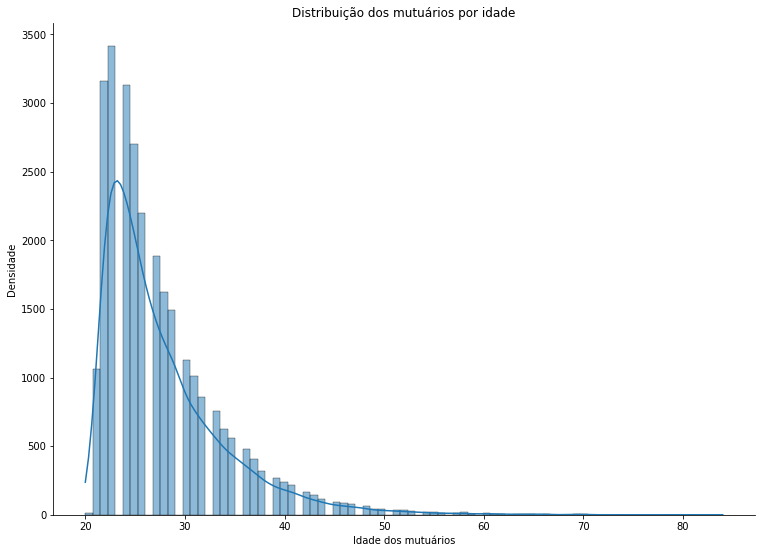

In [23]:
import seaborn as sns

ax = sns.displot(dados['idade'], kde= True, bins = 85)
ax.set(xlabel= 'Idade dos mutuários', ylabel= 'Densidade', title= 'Distribuição dos mutuários por idade')
ax.figure.set_size_inches(12,8)

#### Conclusões

* Nota-se que a maior parte dos mutuários tem entre 20 e 30 anos de idade.
* O mutuário de idade mais avançada tem 84 anos.
* A idade mínima para solicitação de empréstimo é de 20 anos.

### Análise da variável: 'salario_anual'

#### Análises

Avaliaremos a variável 'salario_anual' utilizando duas visualizações.

Distribuição:

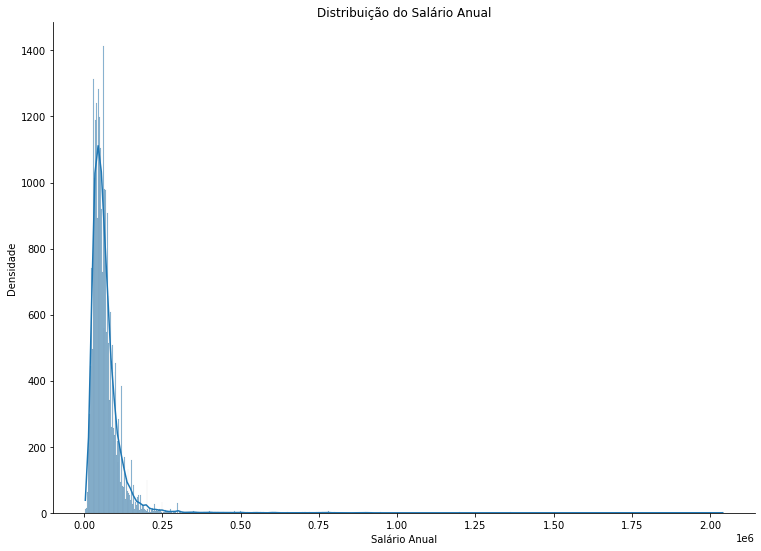

In [24]:
import seaborn as sns

ax = sns.displot(dados['salario_anual'], kde= True)
ax.set(xlabel= 'Salário Anual', ylabel= 'Densidade', title= 'Distribuição do Salário Anual')
ax.figure.set_size_inches(12,8)

Box-plot:

In [25]:
import plotly.express as px

fig = px.box(dados, 
             y="salario_anual",
             width=400,
             height=800,
             title = 'Salário Anual')
fig.show()

Através das visualizações gráficas, consegue-se traçar um valor adequado para remoção dos outliers:

In [26]:
dados.loc[dados['salario_anual'] > 800000]

,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
1284,63,1782000.0,Rent,13,Education,C,12025.0,14.27,0,0.01,N,30.0
6183,36,1200000.0,Own,16,Medical,A,10000.0,6.54,0,0.01,N,11.0
11484,50,900000.0,Mortgage,11,Debtconsolidation,B,30000.0,12.69,0,0.03,N,15.0
13654,42,2039784.0,Rent,0,Venture,C,8450.0,12.29,0,0.00,Y,15.0
20002,37,900000.0,Mortgage,5,Personal,C,25000.0,12.87,0,0.03,Y,13.0
21437,47,1362000.0,Mortgage,9,Venture,A,6600.0,7.74,0,0.00,N,17.0
23388,58,900000.0,Rent,18,Debtconsolidation,C,19600.0,13.98,0,0.02,N,28.0
24608,32,1200000.0,Mortgage,1,Venture,A,12000.0,7.51,0,0.01,N,8.0
26835,44,1440000.0,Mortgage,7,Debtconsolidation,A,6400.0,7.40,0,0.00,N,15.0
28420,34,948000.0,Mortgage,18,Personal,B,2000.0,9.99,0,0.00,N,7.0


Removendo outliers do dataset:

In [27]:
dados.drop(dados[dados['salario_anual'] > 800000].index, inplace = True)

Reavaliando visualizações gráficas:

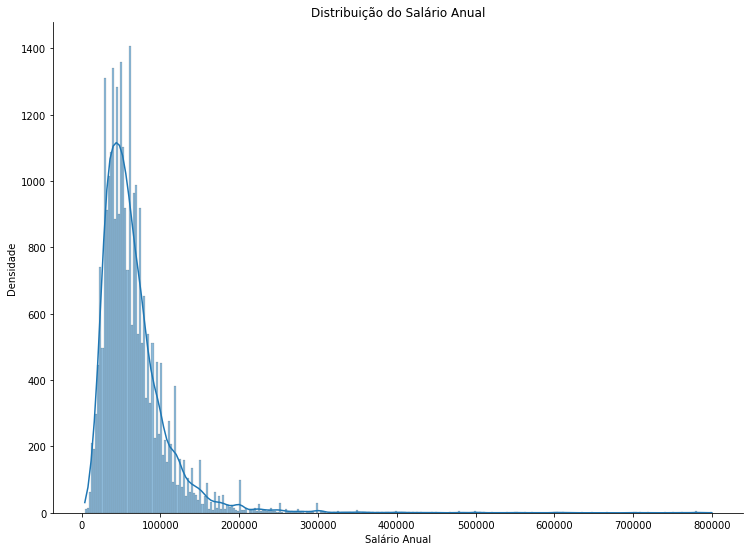

In [28]:
import seaborn as sns

ax = sns.displot(dados['salario_anual'], kde= True)
ax.set(xlabel= 'Salário Anual', ylabel= 'Densidade', title= 'Distribuição do Salário Anual')
ax.figure.set_size_inches(12,8)

In [29]:
import plotly.express as px

fig = px.box(dados, 
             y="salario_anual",
             width=400,
             height=800,
             title = 'Salário Anual')
fig.show()

#### Conclusões

* Nota-se que a maior parte dos mutuários tem salário anual de, no máximo, 140mil.
* Após avaliação da distribuição dos dados, optou-se por um teto máximo de 800mil, onde valores acima disto foram removidos por serem considerados ouliers.

### Análise da variável: 'situacao_imovel'

#### Análises

In [30]:
dados['situacao_imovel'].unique()

array(['Mortgage', 'Rent', 'Own', 'Other'], dtype=object)

In [31]:
situacao_imoveis_porcentagens = dados['situacao_imovel'].value_counts(normalize = True) * 100
situacao_imoveis_porcentagens

Rent        50.817496
Mortgage    41.199693
Own          7.654416
Other        0.328396
Name: situacao_imovel, dtype: float64

In [32]:
print(f'{situacao_imoveis_porcentagens[0]:.2f}% dos mutuários moram de aluguel.')
print(f'{situacao_imoveis_porcentagens[1]:.2f}% dos mutuários possuem o imóvel financiado.')
print(f'{situacao_imoveis_porcentagens[2]:.2f}% dos mutuários são proprietários do imóvel.')

50.82% dos mutuários moram de aluguel.
41.20% dos mutuários possuem o imóvel financiado.
7.65% dos mutuários são proprietários do imóvel.


#### Transformação numérica da variável

Transformaremos esta categorização para números:

In [33]:
tradudor_situacao_imovel = {'Mortgage': 0, 
                            'Rent' : 1,
                            'Own' : 2,
                            'Other' : 3}

dados['situacao_imovel'].replace(tradudor_situacao_imovel, inplace=True)

In [34]:
dados['situacao_imovel'].unique()

array([0, 1, 2, 3])

#### Conclusões

* Esta variável representa a situação da propriedade que a pessoa possui.
* Variável 'situacao_imovel' apresenta boa integridade.
* 50.82% dos mutuários moram de aluguel.
* 41.20% dos mutuários possuem o imóvel financiado.
* 7.65% dos mutuários são proprietários do imóvel.

### Análise da variável: 'anos_empregado'

#### Análises

In [35]:
dados['anos_empregado'].unique()

array([  5,   3,   6,   8,   9,   0,   7,   1,   2,  14,  13,   4,  11,
        17,  12,  10,  18,  19,  21,  15,  16,  20,  27,  22, 123,  24,
        23,  28,  31,  41,  26,  38,  29,  25,  34,  30])

Variável 'anos_empregado' apresenta mutuários com excessiva quantidade de anos empregados:

In [36]:
dados.loc[dados['anos_empregado'] > 60]

,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
1022,21,192000.0,0,123,Venture,A,20000.0,6.54,0,0.10,N,4.0
5760,22,59000.0,1,123,Personal,D,35000.0,16.02,1,0.59,Y,3.0


Removendo linhas com dados inconsistentes:

In [37]:
dados.drop(dados[dados['anos_empregado'] > 60].index, inplace = True)

In [38]:
dados['anos_empregado'].unique()

array([ 5,  3,  6,  8,  9,  0,  7,  1,  2, 14, 13,  4, 11, 17, 12, 10, 18,
       19, 21, 15, 16, 20, 27, 22, 24, 23, 28, 31, 41, 26, 38, 29, 25, 34,
       30])

Distribuição:

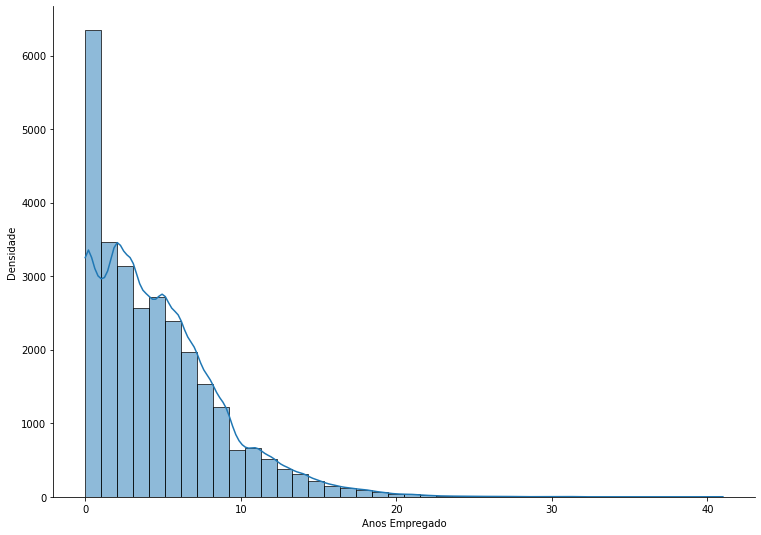

In [39]:
import seaborn as sns

ax = sns.displot(dados['anos_empregado'], kde= True, bins = 40)
ax.set(xlabel= 'Anos Empregado', ylabel= 'Densidade')
ax.figure.set_size_inches(12,8)

Distribuição em porcentagens:

In [40]:
anos_empregado_porcentagens = (dados['anos_empregado'].value_counts(normalize = True) * 100).round(2)

In [41]:
anos_empregado_porcentagens

0     12.95
2     12.12
3     10.95
5      9.48
1      9.23
4      8.98
6      8.36
7      6.88
8      5.36
9      4.28
11     2.31
10     2.20
12     1.81
13     1.32
14     1.07
15     0.74
16     0.53
17     0.40
18     0.33
19     0.21
20     0.13
21     0.12
22     0.06
23     0.03
24     0.03
25     0.03
27     0.02
31     0.01
26     0.01
28     0.01
30     0.01
41     0.00
38     0.00
29     0.00
34     0.00
Name: anos_empregado, dtype: float64

In [42]:
print(f'{anos_empregado_porcentagens[0] + anos_empregado_porcentagens[1]}% dos mutuários está empregado a no máximo 1 ano.')

22.18% dos mutuários está empregado a no máximo 1 ano.


#### Conclusões

* Esta variável representa a quantidade de anos que o mutuário passou empregado até a data de solicitação do empréstimo.

* 22.18% dos mutuários está empregado à, no máximo, 1 ano.

### Análise da variável: 'motivo_emprestimo'

#### Análises

Conferindo dados preenchidos:

In [43]:
dados['motivo_emprestimo'].unique()

array(['Homeimprovement', 'Venture', 'Education', 'Personal',
       'Debtconsolidation', 'Medical'], dtype=object)

Distribuição dos dados em porcentagem:

In [44]:
motivo_emprestimo_porcentagens = (dados['motivo_emprestimo'].value_counts(normalize = True) * 100).round(2)
motivo_emprestimo_porcentagens

Education            19.92
Medical              18.49
Venture              17.46
Personal             17.03
Debtconsolidation    15.94
Homeimprovement      11.17
Name: motivo_emprestimo, dtype: float64

In [45]:
print(f'{motivo_emprestimo_porcentagens[0]}% dos mutuários solicitaram empréstimo para investir em educação.')
print(f'{motivo_emprestimo_porcentagens[1]}% dos mutuários solicitaram empréstimo por motivos médicos e/ou de saúde.')
print(f'{motivo_emprestimo_porcentagens[2]}% dos mutuários solicitaram empréstimo para investir em um empreendimento.')
print(f'{motivo_emprestimo_porcentagens[3]}% dos mutuários solicitaram empréstimo por motivos pessoais.')
print(f'{motivo_emprestimo_porcentagens[4]}% dos mutuários solicitaram empréstimo para pagar dívidas.')
print(f'{motivo_emprestimo_porcentagens[5]}% dos mutuários solicitaram empréstimo para reformar a casa.')

19.92% dos mutuários solicitaram empréstimo para investir em educação.
18.49% dos mutuários solicitaram empréstimo por motivos médicos e/ou de saúde.
17.46% dos mutuários solicitaram empréstimo para investir em um empreendimento.
17.03% dos mutuários solicitaram empréstimo por motivos pessoais.
15.94% dos mutuários solicitaram empréstimo para pagar dívidas.
11.17% dos mutuários solicitaram empréstimo para reformar a casa.


#### Transformação numérica da variável

Transformaremos esta categorização para números:

In [46]:
tradudor_motivo_emprestimo = {'Homeimprovement': 0, 
                              'Venture' : 1,
                              'Education' : 2,
                              'Personal' : 3,
                              'Debtconsolidation' : 4,
                              'Medical' : 5}

dados['motivo_emprestimo'].replace(tradudor_motivo_emprestimo, inplace=True)

In [47]:
dados['motivo_emprestimo'].unique()

array([0, 1, 2, 3, 4, 5])

#### Conclusões

* Variável 'motivo_emprestimo' apresenta boa integridade.
* 38.41% dos mutuários solicitaram empréstimo por motivos educacionais ou de saúde.



### Análise da variável: 'pontuacao_emprestimo'

#### Análises

Conferindo dados preenchidos:

In [48]:
dados['pontuacao_emprestimo'].unique()

array(['B', 'D', 'A', 'C', 'E', 'F', 'G'], dtype=object)

Distribuição dos dados em porcentagem:

In [49]:
pontuacao_emprestimo_porcentagens = (dados['pontuacao_emprestimo'].value_counts(normalize = True) * 100).round(2)
pontuacao_emprestimo_porcentagens

A    32.83
B    31.96
C    19.89
D    11.34
E     3.04
F     0.73
G     0.21
Name: pontuacao_emprestimo, dtype: float64

In [50]:
print(f'{pontuacao_emprestimo_porcentagens[0] + pontuacao_emprestimo_porcentagens[1]:.2f}% dos mutuários tem avaliação A ou B.')

64.79% dos mutuários tem avaliação A ou B.


#### Transformação numérica da variável

Transformaremos esta categorização para números:

In [51]:
tradudor_pontuacao_emprestimo = {'A': 0,
                                 'B' : 1,
                                 'C' : 2,
                                 'D' : 3,
                                 'E' : 4,
                                 'F' : 5,
                                 'G' : 6}

dados['pontuacao_emprestimo'].replace(tradudor_pontuacao_emprestimo, inplace=True)

In [52]:
dados['pontuacao_emprestimo'].unique()

array([1, 3, 0, 2, 4, 5, 6])

#### Conclusões

* Variável 'pontuacao_emprestimo' apresenta boa integridade.
* 64.79% dos mutuários tem avaliação A ou B.

### Análise da variável: 'total_a_emprestar'

#### Análises

Inicialmente, plotaremos um gráfico de distribuição agrupados em faixas de $500:

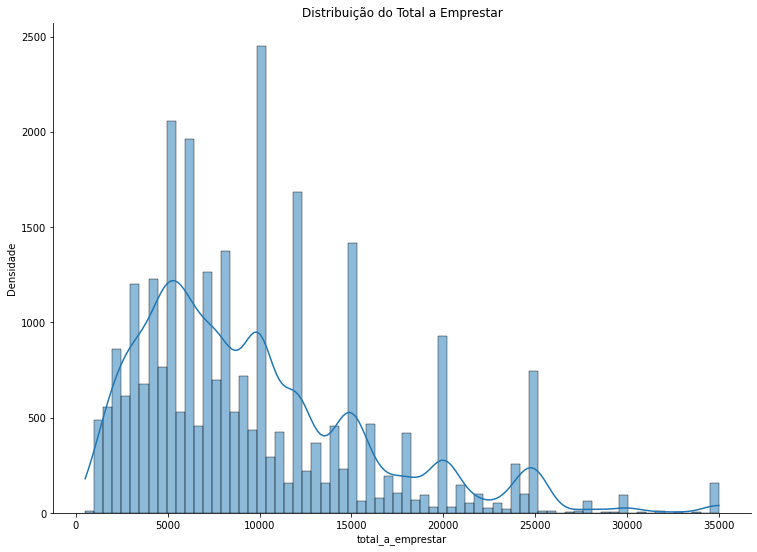

In [53]:
import seaborn as sns

ax = sns.displot(dados['total_a_emprestar'], kde= True, bins = 70)
ax.set(xlabel= 'total_a_emprestar', ylabel= 'Densidade', title= 'Distribuição do Total a Emprestar')
ax.figure.set_size_inches(12,8)

#### Conclusões

* Variavel 'total_a_emprestar' apresenta boa integridade.
* Observa-se que as faixas de valor de maior interesse para se tomar emprestado são as múltiplos de 5: 5mil, 10mil, 15mil, 20mil, 25mil e 35mil.
* Nota-se, também, que valores abaixo de 10mil são mais propensos à ajustes na faixa de 1mil.
* Um destaque especial está nas faixas de 5mil e 6mil, que apresentam densidade próxima, não observada em faixas superiores.
* O valor mais comum para se tomar emprestado é de 10mil.

### Análise da variável: 'juros'

#### Análise

Distribuição visual das taxas de juros:

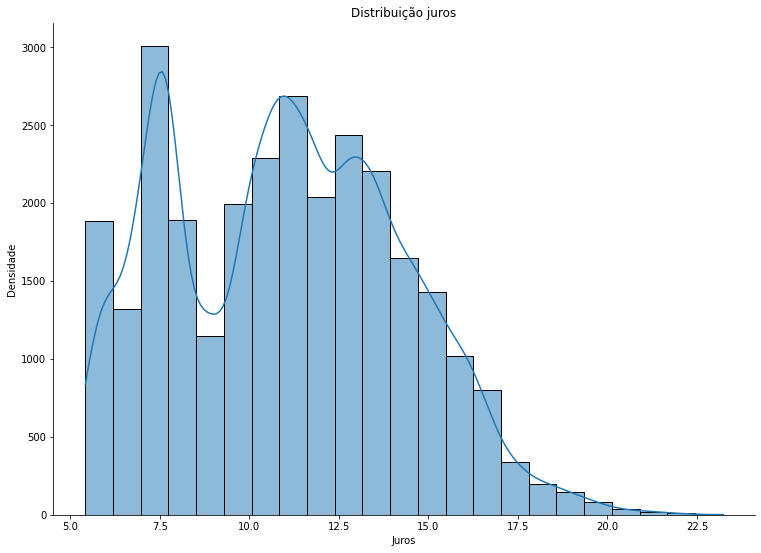

In [54]:
import seaborn as sns

ax = sns.displot(dados['juros'], kde= True, bins = 23)
ax.set(xlabel= 'Juros', ylabel= 'Densidade', title= 'Distribuição juros')
ax.figure.set_size_inches(12,8)

Distribuição, em porcentagem, de cada faixa da taxa de juros:

In [55]:
intervalos_de_juros = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
dados['juros'].value_counts(bins=intervalos_de_juros, sort=True, normalize=True).round(2) * 100 

(7.0, 8.0]      14.0
(11.0, 12.0]    12.0
(10.0, 11.0]    11.0
(13.0, 14.0]    10.0
(12.0, 13.0]     9.0
(6.0, 7.0]       8.0
(9.0, 10.0]      7.0
(14.0, 15.0]     7.0
(15.0, 16.0]     6.0
(8.0, 9.0]       5.0
(4.999, 6.0]     4.0
(16.0, 17.0]     3.0
Name: juros, dtype: float64

#### Conclusões

* Variável 'juros' apresenta boa integridade.
* A faixa de juros mais comum é de 7% à 8%, com 14% dos mutuários pagando juros nesta faixa.
* 47% dos mutuários pagam entre 7% e 14% de juros.


### Análise da variável: 'possibilidade_inadimplencia'

#### Análises

In [56]:
dados['possibilidade_inadimplencia'].unique()

array([0, 1])

In [57]:
possibilidade_inadimplencia_porcentagens = (dados['possibilidade_inadimplencia'].value_counts(normalize = True) * 100).round(2)
possibilidade_inadimplencia_porcentagens

0    78.33
1    21.67
Name: possibilidade_inadimplencia, dtype: float64

#### Conclusões

* Variável 'possibilidade_inadimplencia' apresenta boa integridade e já está convertida para valores numéricos binários.

* O dataset apresenta 78.33% de valores 0, ou seja, possíveis adimplentes.
* O dataset apresente 21.67% de valores 1, ou seja, possíveis inadimplentes.

### Análise da variável: 'percentual_emprestimo_renda'

#### Análises

Avaliando valores únicos da variável:

In [58]:
dados['percentual_emprestimo_renda'].unique()

array([0.25, 0.11, 0.15, 0.17, 0.08, 0.07, 0.31, 0.28, 0.22, 0.44, 0.14,
       0.04, 0.26, 0.1 , 0.12, 0.24, 0.09, 0.06, 0.18, 0.03, 0.16, 0.29,
       0.02, 0.33, 0.3 , 0.13, 0.19, 0.38, 0.47, 0.01, 0.2 , 0.23, 0.37,
       0.39, 0.53, 0.05, 0.27, 0.21, 0.4 , 0.32, 0.36, 0.34, 0.45, 0.57,
       0.52, 0.51, 0.54, 0.42, 0.43, 0.5 , 0.35, 0.41, 0.46, 0.59, 0.48,
       0.49, 0.63, 0.67, 0.6 , 0.55, 0.56, 0.65, 0.7 , 0.68, 0.  , 0.71,
       0.58, 0.64, 0.83, 0.76, 0.72, 0.78, 0.61, 0.77, 0.62, 0.66, 0.69])

Distribuição visual da variável:

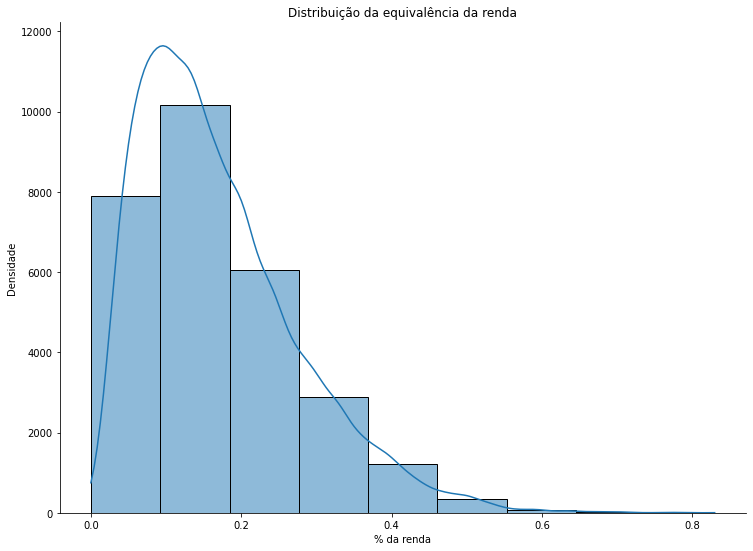

In [59]:
import seaborn as sns

ax = sns.displot(dados['percentual_emprestimo_renda'], kde= True, bins = 9)
ax.set(xlabel= '% da renda', ylabel= 'Densidade', title= 'Distribuição da equivalência da renda')
ax.figure.set_size_inches(12,8)

Distribuição em porcentagens:

In [60]:
intervalos_de_perc_renda = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dados['percentual_emprestimo_renda'].value_counts(bins=intervalos_de_perc_renda, sort=True, normalize=True).round(2) * 100

(0.1, 0.2]       37.0
(-0.001, 0.1]    32.0
(0.2, 0.3]       19.0
(0.3, 0.4]        8.0
(0.4, 0.5]        3.0
(0.5, 0.6]        1.0
(0.6, 0.7]        0.0
(0.7, 0.8]        0.0
(0.8, 0.9]        0.0
Name: percentual_emprestimo_renda, dtype: float64

#### Conclusões

* A variável apresenta boa integridade de dados.
* 37% dos mutuários emprestam um valor equivalente de 1% a 2% da sua renda anual.
* 88% dos mutuários emprestam um valor equivalente de não mais que 3% da sua renda anual.

### Análise da variável: 'ja_foi_inadimplente'

#### Análises

In [61]:
dados['ja_foi_inadimplente'].unique()

array(['N', 'Y'], dtype=object)

In [62]:
inadimplentes = dados['ja_foi_inadimplente'].value_counts(normalize = True).round(2) * 100
inadimplentes

N    82.0
Y    18.0
Name: ja_foi_inadimplente, dtype: float64

#### Transformação numérica da variável

In [63]:
tradutor_inadimplentes = {'N': 0, 
                          'Y' : 1}

dados['ja_foi_inadimplente'].replace(tradutor_inadimplentes, inplace=True)

In [64]:
dados['ja_foi_inadimplente'].unique()

array([0, 1])

#### Conclusões

* A variável apresenta boa integridade de dados.
* 82% dos mutuários nunca foram inadimplentes.

### Análise da variável: 'anos_de_credito'

#### Análises

In [65]:
dados['anos_de_credito'].unique()

array([ 3.,  2.,  4., 10.,  8.,  9.,  6.,  7., 13.,  5., 11., 12., 15.,
       17., 16., 28., 27., 14., 26., 20., 24., 25., 18., 30., 22., 19.,
       21., 29., 23.])

In [66]:
dados['anos_de_credito'].value_counts(normalize = True).round(2) * 100

3.0     18.0
4.0     18.0
2.0     18.0
7.0      6.0
8.0      6.0
9.0      6.0
5.0      6.0
6.0      6.0
10.0     6.0
14.0     2.0
12.0     1.0
11.0     1.0
16.0     1.0
13.0     1.0
15.0     1.0
17.0     1.0
20.0     0.0
24.0     0.0
28.0     0.0
22.0     0.0
23.0     0.0
27.0     0.0
30.0     0.0
19.0     0.0
21.0     0.0
26.0     0.0
25.0     0.0
18.0     0.0
29.0     0.0
Name: anos_de_credito, dtype: float64

#### Conclusões

* A variável apresenta boa integridade de dados.
* 54% dos mutuários obtiveram a primeira linha de crédito de 2 a 4 anos atrás.

### Reorganizando índice:

In [67]:
dados.reset_index(drop=True, inplace=True)

In [68]:
dados.head()

,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
0,26,50000.0,0,5,0,1,12375.0,10.99,0,0.25,0,3.0
1,22,45000.0,1,3,1,1,5000.0,12.42,0,0.11,0,2.0
2,26,155142.0,0,6,0,3,23000.0,18.25,0,0.15,0,2.0
3,24,49232.0,1,8,2,0,8500.0,6.54,0,0.17,0,4.0
4,26,125000.0,1,6,1,0,10000.0,7.49,0,0.08,0,2.0


In [69]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28622 entries, 0 to 28621
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        28622 non-null  int64  
 1   salario_anual                28622 non-null  float64
 2   situacao_imovel              28622 non-null  int64  
 3   anos_empregado               28622 non-null  int64  
 4   motivo_emprestimo            28622 non-null  int64  
 5   pontuacao_emprestimo         28622 non-null  int64  
 6   total_a_emprestar            28622 non-null  float64
 7   juros                        28622 non-null  float64
 8   possibilidade_inadimplencia  28622 non-null  int64  
 9   percentual_emprestimo_renda  28622 non-null  float64
 10  ja_foi_inadimplente          28622 non-null  int64  
 11  anos_de_credito              28622 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 2.6 MB


## Highlights da análise exploratória das variáveis

> **'idade':**
* Nota-se que a maior parte dos mutuários tem entre 20 e 30 anos de idade.
* O mutuário de idade mais avançada tem 84 anos.
* A idade mínima para solicitação de empréstimo é de 20 anos.

> **'salario_anual':**
* Nota-se que a maior parte dos mutuários tem salário anual de, no máximo, 140mil.
* Após avaliação da distribuição dos dados, optou-se por um teto máximo de 800mil, onde valores acima disto foram removidos por serem considerados ouliers.

> **'situacao_imovel':**
* Esta variável representa a situação da propriedade que o mutuário possui.
* 50.82% dos mutuários moram de aluguel.
* 41.20% dos mutuários possuem o imóvel financiado.
* 7.65% dos mutuários são proprietários do imóvel.

> **'anos_empregado':**
* Esta variável representa a quantidade de anos que o mutuário passou empregado até a data de solicitação do empréstimo.
* 22.18% dos mutuários está empregado à, no máximo, 1 ano.

> **'pontuacao_emprestimo':**
* 64.79% dos mutuários tem avaliação A ou B.

> **'total_a_emprestar':**
* Observa-se que as faixas de valor de maior interesse para se tomar emprestado são as múltiplos de 5: 5mil, 10mil, 15mil, 20mil, 25mil e 35mil.
* Nota-se, também, que valores abaixo de 10mil são mais propensos à ajustes na faixa de 1mil.
* Um destaque especial está nas faixas de 5mil e 6mil, que apresentam densidade próxima, não observada em faixas superiores.
* O valor mais comum para se tomar emprestado é de 10mil.


> **'juros':**
* A faixa de juros mais comum é de 7% à 8%, com 14% dos mutuários pagando juros nesta faixa.
* 47% dos mutuários pagam entre 7% e 14% de juros.

> **'possibilidade_inadimplencia':**
* O dataset apresenta 78.33% de valores 0, ou seja, possíveis adimplentes.
* O dataset apresente 21.67% de valores 1, ou seja, possíveis inadimplentes.

> **'percentual_emprestimo_renda':**
* 37% dos mutuários emprestam um valor equivalente de 1% a 2% da sua renda anual.
* 88% dos mutuários emprestam um valor equivalente de não mais que 3% da sua renda anual.

> **'ja_foi_inadimplente':**
* 82% dos mutuários nunca foram inadimplentes.

> **'anos_de_credito':**
* 54% dos mutuários obtiveram a primeira linha de crédito de 2 a 4 anos atrás.


# Machine Learning